<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.920889,35.038014,72.520766,117.305342,324.785011,186.841904,137.943107
1,0.0,1.0,25.989280,61.697507,49.163526,-89.686153,57.164159,231.259184,-174.095025
2,0.0,2.0,25.258168,28.323881,77.603660,-73.097192,68.088517,203.168709,-135.080193
3,0.0,3.0,90.055617,28.122626,58.620693,150.181891,336.980828,166.445266,170.535563
4,0.0,4.0,22.030059,45.384361,66.927761,23.657872,168.000054,221.606596,-53.606542
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.038077,57.545483,95.802168,196.018882,393.404609,237.638029,155.766580
249996,999.0,246.0,21.928208,60.544416,89.581435,396.570291,578.624350,234.728156,343.896194
249997,999.0,247.0,93.030151,32.112707,35.131672,-184.396792,-14.122262,132.195992,-146.318254
249998,999.0,248.0,73.701367,43.767854,53.453385,-37.853788,143.068817,176.505501,-33.436684


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.920889  35.038014  72.520766  117.305342  324.785011   
      1.0    25.989280  61.697507  49.163526  -89.686153   57.164159   
      2.0    25.258168  28.323881  77.603660  -73.097192   68.088517   
      3.0    90.055617  28.122626  58.620693  150.181891  336.980828   
      4.0    22.030059  45.384361  66.927761   23.657872  168.000054   
...                ...        ...        ...         ...         ...   
999.0 245.0  34.038077  57.545483  95.802168  196.018882  393.404609   
      246.0  21.928208  60.544416  89.581435  396.570291  578.624350   
      247.0  93.030151  32.112707  35.131672 -184.396792  -14.122262   
      248.0  73.701367  43.767854  53.453385  -37.853788  143.068817   
      249.0  32.146351  98.109243  72.950240 -666.580514 -453.374681   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    186.841904  137.943107  
      1.0    231.259184 -174.095025  
      2.0    203.168709 -135.080193  
      3.0    166.445266  170.535563  
      4.0    221.606596  -53.606542  
...                 ...         ...  
999.0 245.0  237.638029  155.766580  
      246.0  234.728156  343.896194  
      247.0  132.195992 -146.318254  
      248.0  176.505501  -33.436684  
      249.0  352.173107 -805.547788  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.920889  35.038014  72.520766  117.305342  324.785011   
      1.0    25.989280  61.697507  49.163526  -89.686153   57.164159   
      2.0    25.258168  28.323881  77.603660  -73.097192   68.088517   
      3.0    90.055617  28.122626  58.620693  150.181891  336.980828   
      4.0    22.030059  45.384361  66.927761   23.657872  168.000054   
...                ...        ...        ...         ...         ...   
999.0 245.0  34.038077  57.545483  95.802168  196.018882  393.404609   
      246.0  21.928208  60.544416  89.581435  396.570291  578.624350   
      247.0  93.030151  32.112707  35.131672 -184.396792  -14.122262   
      248.0  73.701367  43.767854  53.453385  -37.853788  143.068817   
      249.0  32.146351  98.109243  72.950240 -666.580514 -453.374681   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    186.841904  137.943107  
      1.0    231.259184 -174.095025  
      2.0    203.168709 -135.080193  
      3.0    166.445266  170.535563  
      4.0    221.606596  -53.606542  
...                 ...         ...  
999.0 245.0  237.638029  155.766580  
      246.0  234.728156  343.896194  
      247.0  132.195992 -146.318254  
      248.0  176.505501  -33.436684  
      249.0  352.173107 -805.547788  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.920889,35.038014,72.520766,117.305342,324.785011,186.841904,137.943107
1,0.0,1.0,25.989280,61.697507,49.163526,-89.686153,57.164159,231.259184,-174.095025
2,0.0,2.0,25.258168,28.323881,77.603660,-73.097192,68.088517,203.168709,-135.080193
3,0.0,3.0,90.055617,28.122626,58.620693,150.181891,336.980828,166.445266,170.535563
4,0.0,4.0,22.030059,45.384361,66.927761,23.657872,168.000054,221.606596,-53.606542
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.038077,57.545483,95.802168,196.018882,393.404609,237.638029,155.766580
249996,999.0,246.0,21.928208,60.544416,89.581435,396.570291,578.624350,234.728156,343.896194
249997,999.0,247.0,93.030151,32.112707,35.131672,-184.396792,-14.122262,132.195992,-146.318254
249998,999.0,248.0,73.701367,43.767854,53.453385,-37.853788,143.068817,176.505501,-33.436684


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.920889  35.038014  72.520766  117.305342  324.785011   
      1.0    25.989280  61.697507  49.163526  -89.686153   57.164159   
      2.0    25.258168  28.323881  77.603660  -73.097192   68.088517   
      3.0    90.055617  28.122626  58.620693  150.181891  336.980828   
      4.0    22.030059  45.384361  66.927761   23.657872  168.000054   
...                ...        ...        ...         ...         ...   
999.0 245.0  34.038077  57.545483  95.802168  196.018882  393.404609   
      246.0  21.928208  60.544416  89.581435  396.570291  578.624350   
      247.0  93.030151  32.112707  35.131672 -184.396792  -14.122262   
      248.0  73.701367  43.767854  53.453385  -37.853788  143.068817   
      249.0  32.146351  98.109243  72.950240 -666.580514 -453.374681   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    186.841904  137.943107  
      1.0    231.259184 -174.095025  
      2.0    203.168709 -135.080193  
      3.0    166.445266  170.535563  
      4.0    221.606596  -53.606542  
...                 ...         ...  
999.0 245.0  237.638029  155.766580  
      246.0  234.728156  343.896194  
      247.0  132.195992 -146.318254  
      248.0  176.505501  -33.436684  
      249.0  352.173107 -805.547788  

[250000 rows x 7 columns]

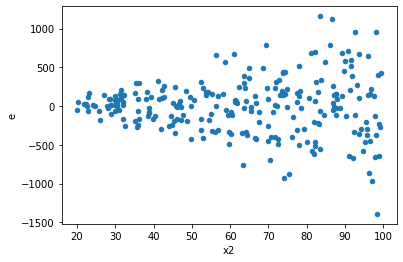

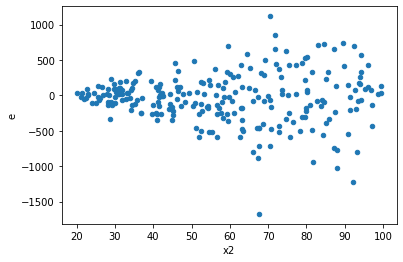

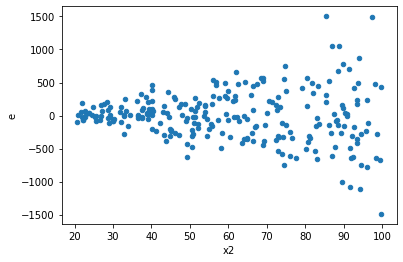

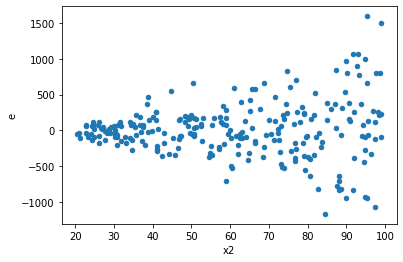

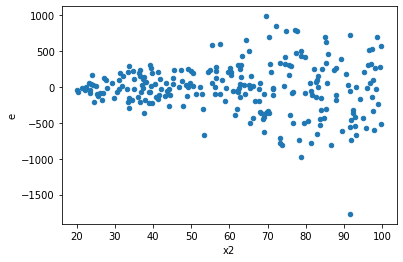

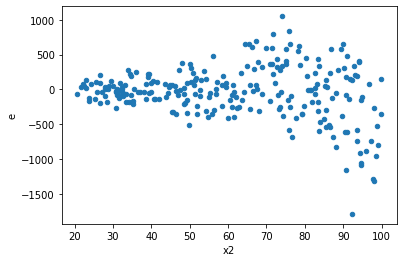

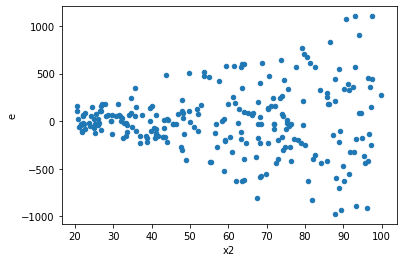

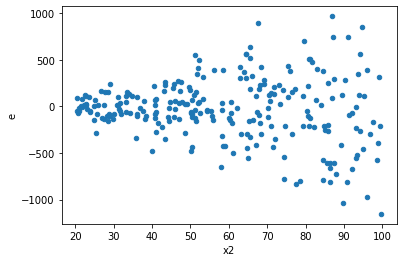

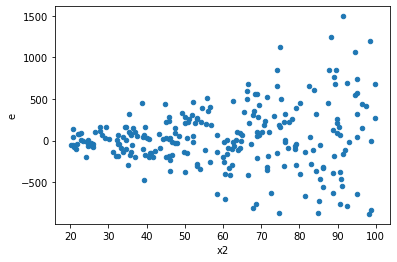

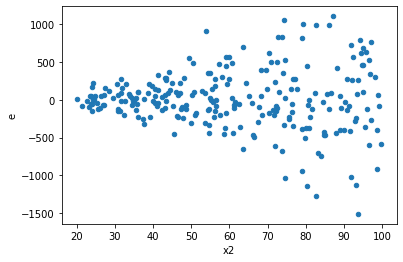

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,119.0,125.0,14635563.388027614,16260437.169048004,122987.92763048415,130083.49735238403,1.0576932212665493,0.7561211162603616,0.6219394418698192,0.3780605581301808,Reject005=1 : Homoscedasticity
3.0,122.0,122.0,15596538.677975625,17068250.088961083,127840.48096701331,139903.68925377936,1.0943614119371057,0.619272060985806,0.690363969507097,0.309636030492903,Reject005=1 : Homoscedasticity
4.0,118.0,126.0,12830562.722212426,18956508.015714355,108733.58239163073,150448.4763151933,1.3836431487497223,0.07346535102817775,0.9632673244859111,0.036732675514088875,Reject005=1 : Homoscedasticity
5.0,119.0,125.0,3406688.114482536,33881867.89591974,28627.631214138957,271054.94316735794,9.468297992936492,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,119.0,125.0,5433270.936687845,33623403.12927819,45657.738963763404,268987.2250342255,5.891382953669895,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,121.0,123.0,13303876.078445196,15601462.817473441,109949.38907805947,126841.16111767026,1.153632250085704,0.4307266234800471,0.7846366882599765,0.21536331174002354,Reject005=1 : Homoscedasticity
10.0,128.0,116.0,15424188.24997485,15470778.139991034,120501.47070292852,133368.77706888822,1.106781322177232,0.5789448079996347,0.7105275960001827,0.28947240399981733,Reject005=1 : Homoscedasticity
12.0,114.0,130.0,16266461.980565863,19239202.60715859,142688.26298741985,147993.86620891222,1.037183178983405,0.8377094329179418,0.5811452835410291,0.4188547164589709,Reject005=1 : Homoscedasticity
13.0,130.0,114.0,6750758.729121878,30372896.39878395,51928.91330093752,266428.91577880655,5.130646856305319,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,115.0,129.0,34344642.208942324,5326499.759788559,298649.06268645497,41290.69581231441,0.13825824678935822,1.5718022408723347e-23,Reject005=0 : Heteroscedasticity
1.0,119.0,125.0,14635563.388027614,16260437.169048004,122987.92763048415,130083.49735238403,1.0576932212665493,0.7561211162603616,Reject005=1 : Homoscedasticity
2.0,132.0,112.0,33325998.335664213,4464388.323971583,252469.6843610925,39860.61003546056,0.1578827578302442,1.8756482616516003e-22,Reject005=0 : Heteroscedasticity
3.0,122.0,122.0,15596538.677975625,17068250.088961083,127840.48096701331,139903.68925377936,1.0943614119371057,0.619272060985806,Reject005=1 : Homoscedasticity
4.0,118.0,126.0,12830562.722212426,18956508.015714355,108733.58239163073,150448.4763151933,1.3836431487497223,0.07346535102817775,Reject005=1 : Homoscedasticity
5.0,119.0,125.0,3406688.114482536,33881867.89591974,28627.631214138957,271054.94316735794,9.468297992936492,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,119.0,125.0,5433270.936687845,33623403.12927819,45657.738963763404,268987.2250342255,5.891382953669895,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,121.0,123.0,13303876.078445196,15601462.817473441,109949.38907805947,126841.16111767026,1.153632250085704,0.4307266234800471,Reject005=1 : Homoscedasticity
8.0,121.0,123.0,15202760.308191128,15247329.635494703,125642.64717513329,123962.0295568675,0.9866238283254,0.941233896904648,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    571
Reject005=1 : Homoscedasticity      429
Name: Result_test, dtype: int64